![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).




Elaborado por: Wilson Andrey Lopez Ariza



## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score


In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
bikes2=bikes
# Visualización de los datos
bikes.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes1a=bikes.groupby('season').total.mean()
print(bikes1a)
print(bikes1a.describe())

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64
count      4.000000
mean     191.250013
std       51.994766
min      116.343261
25%      178.327037
50%      207.119834
75%      220.042810
max      234.417124
Name: total, dtype: float64


 <font color='green'>Teniendo en cuenta las cuatro estaciones, podemos observar que la mayor cantidad de bicicletas reportadas tanto registradas como casual, es decir en promedio del total por estacion, se dio en **verano**; por el contrario la menor cantidad de bicicletas reportada sucedio en invierno, podemos decir que en promedio se usan 191 bicicletas durante las estaciones. Claramente el clima influye directamente en el uso de la bicicleta como medio de transporte, a medida que baja la temperatrura cae el uso de este medio de transporte.</font>

In [5]:
# Celda 1.2
bikes1b=bikes.groupby('hour').total.mean()
print(bikes1b)
print(bikes1b.describe())

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64
count     24.000000
mean     190.742045
std      133.245822
min        6.407240
25%       70.979121
50%      211.895604
75%      256.828399
max      468.765351
Name: total, dtype: float64


 <font color='green'> Se puede observar que entre las 11 de la noche y las 5 de la mañana se reporta la menor cantidad de uso de bicicletas, por lo que vemos que en el primer cuartil el uso de este medio transporte cae, en el tercer cuartil se reporta el mayor uso de este medio de transporte alcanzando una media maxima de 468 biciletasm, reportadas especifcamnete a las 5 de la tarde. en promedio cada hora se usan 190 bicicletas, la hora menos preferida en que se usa este medio es a las 4 de la mañana.</font>


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

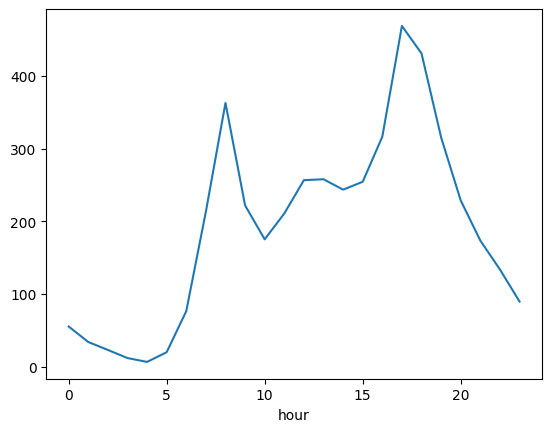

In [6]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

count     24.000000
mean     114.642351
std       83.500331
min        3.336634
25%       39.117257
50%      123.498253
75%      159.508772
max      283.456140
Name: total, dtype: float64
hour
0      28.292035
1      18.761062
2      13.205607
3       7.760417
4       3.336634
5      10.300000
6      42.725664
7     124.433628
8     253.345133
9     154.442478
10    102.168142
11    122.601770
12    154.412281
13    160.771930
14    151.263158
15    159.087719
16    188.640351
17    283.456140
18    258.157895
19    176.315789
20    124.394737
21     95.298246
22     72.912281
23     45.333333
Name: total, dtype: float64


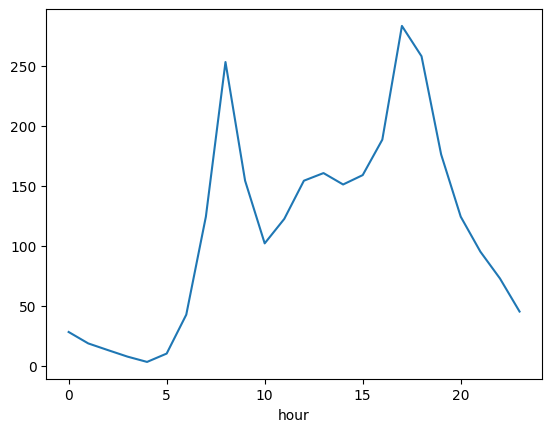

In [7]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 

bikes_invierno = bikes.loc[bikes["season"] == 1].groupby('hour').total.mean()

bikes_invierno.plot()

print(bikes_invierno.describe())
print(bikes_invierno)

count     24.000000
mean     234.193830
std      159.471610
min        8.087719
25%       91.504386
50%      253.793860
75%      307.223684
max      565.385965
Name: total, dtype: float64
hour
0      75.675439
1      44.831858
2      31.707965
3      15.778761
4       8.087719
5      25.728070
6      96.780702
7     264.035088
8     403.508772
9     250.710526
10    218.535088
11    256.877193
12    307.017544
13    304.421053
14    286.350877
15    294.956140
16    371.324561
17    565.385965
18    539.070175
19    413.500000
20    307.842105
21    236.017544
22    180.789474
23    121.719298
Name: total, dtype: float64


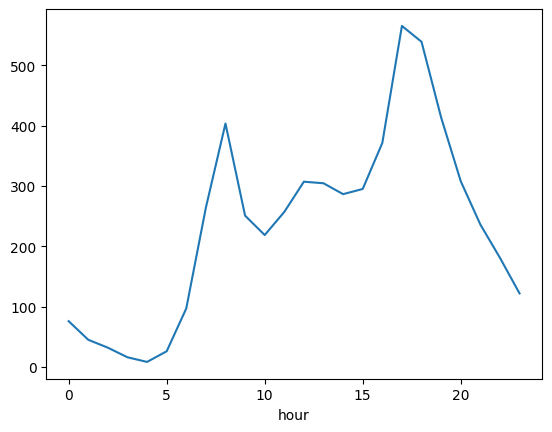

In [8]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes_verano = bikes.loc[bikes["season"] == 3].groupby('hour').total.mean()

bikes_verano.plot()

print(bikes_verano.describe())
print(bikes_verano)

 <font color='green'> Se observa que el comportamniento de alquiler de bicicletas es muy similar en estas dos estaciones, podemos observar que la cantidad minima de uso de bicicletas se da a las 4 de la mañana para las dos estaciones (invierno=3 y verano=8), luego empieza a ascender en ambas categorias hasta las 8 de la mañana donde alcanza un nuevo pico (invierno=253 y verano=403), luego empieza a descender hasta que ambas categorias llegan a las 10 de la mañana donde regitran una nueva caida en el uso de las biciletas (invierno=102 y verano=218) luego empieza un uso regular de este medio hasta las 5 de la tarde donde se alcanzao el pico mas alto de uso o de renta de bicicletas (invierno=283 y verano=565) apartir de esta hora se registra un a caida en el uso de la bicilceta hasta el dia siguiente.</font>
 
  <font color='green'> Aunque la diferencia en cuanto a la cantidad de bicicletas alquiladas es sustancial en ambas estacion, mantienen el mismo comportamiento o patron de alquiler. sin embargo en invierno los dos picos mas altos de uso se dan casi de igual manera en la mañana y en la tarde, lo que no ocurren en verano, donde se observa que la tendencia es que en la tarde se usa en mayor proporcion que en la mañana.</font>

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [9]:
# Codificación one-hot con pd.get_dummies()
bikes1=bikes
bikes = pd.get_dummies(bikes, columns=['season'])
bikes = bikes.rename(columns={'season_1': 'invierno','season_2': 'primavera','season_3': 'verano','season_4': 'otoño'})
bikes=bikes[[ 'invierno','primavera','verano','otoño',"hour","total"]]

import seaborn as sns
bikes.head()


,invierno,primavera,verano,otoño,hour,total
datetime,,,,,,
2011-01-01 00:00:00,1,0,0,0,0,16
2011-01-01 01:00:00,1,0,0,0,1,40
2011-01-01 02:00:00,1,0,0,0,2,32
2011-01-01 03:00:00,1,0,0,0,3,13
2011-01-01 04:00:00,1,0,0,0,4,1


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=bikes[['invierno','primavera','verano', 'otoño',"hour"]]
y=bikes[["total"]]

scaler = StandardScaler()
num_vars = ['invierno','primavera','verano', 'otoño',"hour"]
X[num_vars] = scaler.fit_transform(X[num_vars])


X_train, X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 1280)


num_vars = ['invierno','primavera','verano', 'otoño',"hour"]

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

print(bikes.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10886, 6)
(7620, 5)
(7620, 1)
(3266, 5)
(3266, 1)


In [11]:
X_train.head()

,invierno,primavera,verano,otoño,hour
datetime,,,,,
2012-03-03 01:00:00,1.742417,-0.582199,-0.572097,-0.581189,-1.506397
2011-09-19 18:00:00,-0.573915,-0.582199,1.747956,-0.581189,0.942233
2011-05-07 20:00:00,-0.573915,1.717624,-0.572097,-0.581189,1.230307
2011-10-06 23:00:00,-0.573915,-0.582199,-0.572097,1.720610,1.662418
2011-03-07 11:00:00,1.742417,-0.582199,-0.572097,-0.581189,-0.066026


In [12]:
X_test.head()

,invierno,primavera,verano,otoño,hour
datetime,,,,,
2011-12-03 22:00:00,-0.572329,-0.578977,-0.578977,1.726763,1.512307
2012-12-15 06:00:00,-0.572329,-0.578977,-0.578977,1.726763,-0.801330
2012-02-12 23:00:00,1.747245,-0.578977,-0.578977,-0.579118,1.656909
2012-02-05 22:00:00,1.747245,-0.578977,-0.578977,-0.579118,1.512307
2011-06-02 12:00:00,-0.572329,1.727185,-0.578977,-0.579118,0.066284


In [13]:
y_train.head()

,total
datetime,
2012-03-03 01:00:00,44
2011-09-19 18:00:00,540
2011-05-07 20:00:00,219
2011-10-06 23:00:00,99
2011-03-07 11:00:00,60


In [14]:
y_test.head()

,total
datetime,
2011-12-03 22:00:00,114
2012-12-15 06:00:00,11
2012-02-12 23:00:00,23
2012-02-05 22:00:00,191
2011-06-02 12:00:00,232


In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

print('w = ' + str(reg.coef_) + ', b = ' + str(reg.intercept_))


w = [[-8.13050779e+13 -8.18887027e+13 -8.11747104e+13 -8.18184238e+13
   7.31429443e+01]], b = [189.13856128]


In [16]:
print(reg.score(X_train, y_train))

0.22707019502741377


In [17]:
import sklearn.metrics as metrics

predicciones = reg.predict(X_test)
print(predicciones)
print('Mean Squared Error: MSE', metrics.mean_squared_error(y_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

[[-3.37850741e+11]
 [-3.37850741e+11]
 [-2.67476614e+11]
 ...
 [-2.67476614e+11]
 [-2.67476614e+11]
 [-3.37850741e+11]]
Mean Squared Error: MSE 4.4327337765380387e+23
Root Mean Squared Error RMSE: 665787787251.917


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [18]:
X = bikes2[['season',"hour"]]
y = bikes1.total.astype(int)

print(X.shape)
print(y.shape)

(10886, 2)
(10886,)


In [19]:
# Descripción de la variable de respuesta 'total'
bikes1.total.describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: total, dtype: float64

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X.shape, y.shape

((10886, 2), (10886,))

In [21]:

# Definición de parámetros y criterios de parada
max_depth = None
num_pct =10
max_features = None
min_gain=0.001

# Impresión variable a usar 
j = 0
print(X.columns[j])
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits


season


array([1., 2., 3., 4.])

In [22]:
k=3
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l

# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r

print("splits = ", splits)
print("gini_l = ",gini_l)
print("gini_r = ",gini_r)

splits =  [1. 2. 3. 4.]
gini_l =  -71130.05508741661
gini_r =  -78794.70693090183


In [23]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Ganancia de la variable 'season' en el punto de corte selecionado
gini_impurity(X.iloc[:, j], y, splits[k])


36.87131846396369

In [24]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de corte para hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X, y,2)
j, split, gain

# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

print(j, split, gain)
print("splits = ", splits)
print("gini_l = ",gini_l)
print("gini_r = ",gini_r)

print(y.shape[0], y_l.shape[0], y_r.shape[0])

print(y.mean(), y_l.mean(), y_r.mean())

1 8.0 18268.811823533004
splits =  [1. 2. 3. 4.]
gini_l =  -71130.05508741661
gini_r =  -78794.70693090183
10886 3594 7292
191.57413191254824 55.437673900946024 258.6715578716402


In [25]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=1, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': -1,
  'n_samples': 3594,
  'gain': 7207.700659959655},
 'sr': {'y_pred': 1,
  'y_prob': 258.6007677543186,
  'level': 1,
  'split': -1,
  'n_samples': 7292,
  'gain': 7392.920792160614}}

In [26]:
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': [1, 2.0],
    'n_samples': 2684,
    'gain': 382.8088308604629,
    'sl': {'y_pred': 1,
     'y_prob': 44.41383095499451,
     'level': 4,
     'split': [0, 2.0],
     'n_samples': 909,
     'gain': 291.4004681825131,
     'sl': {'y_pred': 1,
      'y_prob': 23.32456140350877,
      'level': 5,
      'split': [1, 1.0],
      'n_samples': 226,
      'gain': 45.41972746495435,
      'sl': {'y_pred': 1,
       'y_prob': 27.808695652173913,
       'level': 6,
       'split': -1,
       'n_samples': 113,
 

In [27]:

#Se define la función para crear el arbol

def tree_predict(X, tree, proba=True):
    
    predicted = np.ones(X.shape[0])

    # Check if final node
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # If left node is empty only continue with right
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  # If right node is empty only continue with left
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted


tree=tree_grow(X_train, y_train, level=1, min_gain=0.001, max_depth=3, num_pct=10)

df = pd.DataFrame({'real':y_test, 'pred':tree_predict(X_test, tree)})
df

,real,pred
datetime,,
2011-07-19 11:00:00,127,290.407765
2012-01-16 06:00:00,13,32.666356
2011-12-11 18:00:00,163,290.407765
2012-08-15 10:00:00,233,290.407765
2012-06-15 23:00:00,222,131.254089
...,...,...
2011-12-15 15:00:00,82,290.407765
2011-12-11 20:00:00,72,290.407765
2012-07-18 09:00:00,297,290.407765


In [28]:
y_pred=tree_predict(X_test, tree)


In [29]:
import sklearn.metrics as metrics

print(predicciones)
print('Mean Squared Error: MSE', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[[-3.37850741e+11]
 [-3.37850741e+11]
 [-2.67476614e+11]
 ...
 [-2.67476614e+11]
 [-2.67476614e+11]
 [-3.37850741e+11]]
Mean Squared Error: MSE 20349.180090978403
Root Mean Squared Error RMSE: 142.65055236829053


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Text(0, 0.5, 'Accuracy')

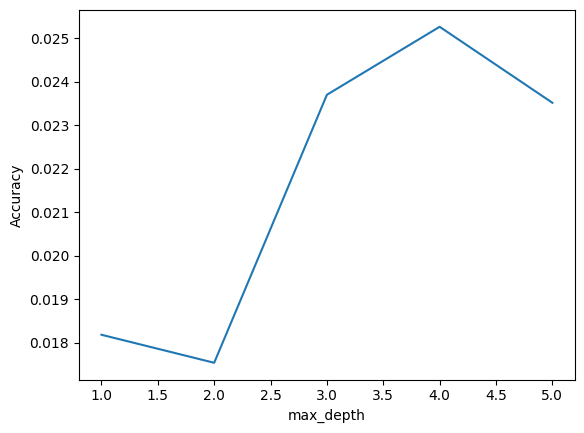

In [30]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
import matplotlib.pyplot as plt

max_depth_range = range(1, 6)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []



# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())
    
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [31]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][1]

(0.02369964686976719, 3)

In [32]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=3, random_state=10)
clf.fit(X, y)

# Impresión de resultados de desemepeño del árbol de decisión
pd.Series(cross_val_score(clf, X, y, cv=10)).describe()

count    10.000000
mean      0.023700
std       0.008448
min       0.011029
25%       0.017447
50%       0.024344
75%       0.028493
max       0.035813
dtype: float64

In [33]:
clfTree = DecisionTreeClassifier()
clfTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
X_train, y_train
print('Filas y columnas de base de datos:',X.shape)
print('Filas y columnas de XTrain:',X_train.shape)
print('Filas y columnas de XTest:',X_test.shape)
print('Filas y columnas de yTrain:',y_train.shape)
print('Filas y columnas de yTest:',y_test.shape)


Filas y columnas de base de datos: (10886, 2)
Filas y columnas de XTrain: (7293, 2)
Filas y columnas de XTest: (3593, 2)
Filas y columnas de yTrain: (7293,)
Filas y columnas de yTest: (3593,)


In [35]:
clfTree = DecisionTreeClassifier()
clfTree.fit(X_train, y_train)

DecisionTreeClassifier()

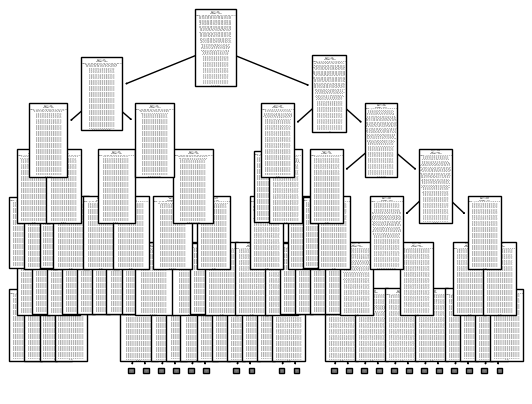

In [36]:
plot_tree(clfTree,max_depth=6)
plt.show()

In [37]:
accuracy_scores

[0.018188570193917786,
 0.017544934640522876,
 0.02369964686976719,
 0.025261134067952253,
 0.02351641414141414]

In [38]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][1]

(0.02369964686976719, 3)

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [39]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            6000 non-null   object 
 1   timedelta                      6000 non-null   float64
 2   n_tokens_title                 6000 non-null   float64
 3   n_tokens_content               6000 non-null   float64
 4   n_unique_tokens                6000 non-null   float64
 5   n_non_stop_words               6000 non-null   float64
 6   n_non_stop_unique_tokens       6000 non-null   float64
 7   num_hrefs                      6000 non-null   float64
 8   num_self_hrefs                 6000 non-null   float64
 9   num_imgs                       6000 non-null   float64
 10  num_videos                     6000 non-null   float64
 11  average_token_length           6000 non-null   float64
 12  num_keywords                   6000 non-null   f

In [41]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,358.138833,10.368667,547.428833,0.527732,0.961333,0.665823,11.874000,3.272500,4.954667,1.463167,...,0.097194,0.762009,-0.265334,-0.530531,-0.110047,0.296854,0.077178,0.343496,0.167633,0.500000
std,210.734614,2.106140,510.232776,0.148356,0.192815,0.167740,13.444103,4.262895,8.635916,4.508144,...,0.076585,0.256845,0.133800,0.294477,0.100482,0.334117,0.282790,0.186815,0.240462,0.500042
min,9.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,175.000000,9.000000,231.000000,0.465950,1.000000,0.619624,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.340000,-0.714286,-0.125000,0.000000,0.000000,0.166667,0.000000,0.000000
50%,345.000000,10.000000,391.000000,0.541477,1.000000,0.689119,8.000000,2.000000,1.000000,0.000000,...,0.100000,0.800000,-0.260185,-0.500000,-0.100000,0.200000,0.000000,0.500000,0.016667,0.500000
75%,544.250000,12.000000,719.000000,0.614980,1.000000,0.756237,15.000000,4.000000,7.000000,1.000000,...,0.100000,1.000000,-0.191273,-0.300000,-0.050000,0.500000,0.166667,0.500000,0.250000,1.000000
max,731.000000,19.000000,8474.000000,0.967742,1.000000,1.000000,304.000000,116.000000,111.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,1.000000


In [42]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

# División de la muestra en set de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [43]:
# Celda 6
print('Filas y columnas de base de datos:',X.shape)
print('Filas y columnas de XTrain:',X_train.shape)
print('Filas y columnas de XTest:',X_test.shape)
print('Filas y columnas de yTrain:',y_train.shape)
print('Filas y columnas de yTest:',y_test.shape)

Filas y columnas de base de datos: (6000, 59)
Filas y columnas de XTrain: (4500, 59)
Filas y columnas de XTest: (1500, 59)
Filas y columnas de yTrain: (4500,)
Filas y columnas de yTest: (1500,)


### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

#### Árbol de decisión 

In [44]:
clfTree = DecisionTreeClassifier()
clfTree.fit(X_train, y_train)

DecisionTreeClassifier()

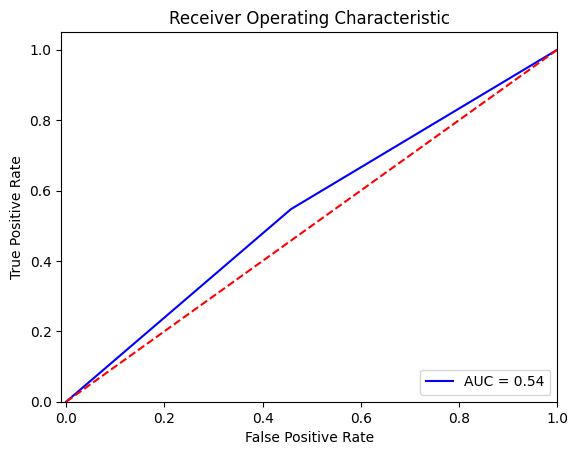

El MSE del modelo en la muestra de evaluación es igual a:
0.4553333333333333


In [45]:
prediccionTree=clfTree.predict_proba(X_test)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionTree, pos_label=0)
AUCTree=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCTree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

prediccion=clfTree.predict(X_test)
MSEArbol=np.average(np.square(prediccion-y_test))
print("El MSE del modelo en la muestra de evaluación es igual a:")
print(MSEArbol)


In [46]:
model_DD = DecisionTreeClassifier()
 
max_depth = range(1,10,1)
min_samples_leaf = range(1,10,2)
tuned_parameters = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
 
from sklearn.model_selection import GridSearchCV
DD = GridSearchCV(model_DD, tuned_parameters,cv=10)
DD.fit(X_train, y_train)
 
print("Best: %f using %s" % (DD.best_score_, DD.best_params_))

Best: 0.630889 using {'max_depth': 1, 'min_samples_leaf': 1}


In [47]:
y_pred=clfTree.predict(X_test)
y_pred.shape

(1500,)

In [48]:
y_test

1483    0
2185    1
2520    0
3721    1
3727    0
       ..
3077    0
5166    1
2227    1
5684    1
1937    0
Name: Popular, Length: 1500, dtype: int64

In [49]:
y_pred.shape

(1500,)

In [50]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

print("accuracy_score =", accuracy_score(y_test, y_pred))
print("f1_score =",f1_score(y_test, y_pred))


Precisión del modelo:
0.5488621151271754
accuracy_score = 0.5446666666666666
f1_score = 0.5455755156353959


#### Regresión logística

In [51]:
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=1)

escalar = StandardScaler()
X_train1 = escalar.fit_transform(X_train1)
X_test1 = escalar.transform(X_test1)

algoritmo = LogisticRegression()
#Entrenamos el modelo
algoritmo.fit(X_train1, y_train1)

#Realizamos una predicción
y_pred1= algoritmo.predict(X_test1)

#Verifico la matriz de Confusión
matriz = confusion_matrix(y_test1, y_pred1)
print('Matriz de Confusión:')
print(matriz)

tn, fp, fn, tp = confusion_matrix(y_test1, y_pred1).ravel()

print("accuracy_score =", accuracy_score(y_test1, y_pred1))
print("f1_score =",f1_score(y_test1, y_pred1))


#Calculo la precisión del modelo


precision = precision_score(y_test1, y_pred1)
print('Precisión del modelo:')
print(precision)



Matriz de Confusión:
[[501 243]
 [297 459]]
accuracy_score = 0.64
f1_score = 0.6296296296296297
Precisión del modelo:
0.6538461538461539


In [52]:
y_test1

1483    0
2185    1
2520    0
3721    1
3727    0
       ..
3077    0
5166    1
2227    1
5684    1
1937    0
Name: Popular, Length: 1500, dtype: int64

In [53]:
y_pred1

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

### Comparacion de modelos

 <font color='green'> Arbol</font>

Precisión del modelo:
0.5526675786593708

accuracy_score = 0.5473333333333333

f1_score = 0.543375924680565



 <font color='green'>R. log</font>

Precisión del modelo:
0.6538461538461539

accuracy_score = 0.64

f1_score = 0.6296296296296297



 <font color='green'> **Se puede observar que EL modelo de Regresion logistica tiene mejor desempeño que el arbol**</font>



### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [54]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score


# Generar datos sintéticos
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Filas y columnas de base de datos:',X.shape)
print('Filas y columnas de XTrain:',X_train.shape)
print('Filas y columnas de XTest:',X_test.shape)
print('Filas y columnas de yTrain:',y_train.shape)
print('Filas y columnas de yTest:',y_test.shape)

Filas y columnas de base de datos: (1000, 10)
Filas y columnas de XTrain: (800, 10)
Filas y columnas de XTest: (200, 10)
Filas y columnas de yTrain: (800,)
Filas y columnas de yTest: (200,)


In [55]:
# Crear modelos base
tree_model_1 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model_2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
logistic_model = LogisticRegression(random_state=42)

# Crear modelos bagged
n_estimators = 100
tree_bagging_1 = BaggingClassifier(tree_model_1, n_estimators=n_estimators, random_state=42)
tree_bagging_2 = BaggingClassifier(tree_model_2, n_estimators=n_estimators, random_state=42)
logistic_bagging = BaggingClassifier(logistic_model, n_estimators=n_estimators, random_state=42)

In [56]:
# Entrenar modelos bagged y evaluar su desempeño en el conjunto de prueba
tree_bagging_1.fit(X_train, y_train)
y_pred_tree_1 = tree_bagging_1.predict(X_test)
acc_tree_1 = accuracy_score(y_test, y_pred_tree_1)
f1_tree_1 = f1_score(y_test, y_pred_tree_1)

tree_bagging_2.fit(X_train, y_train)
y_pred_tree_2 = tree_bagging_2.predict(X_test)
acc_tree_2 = accuracy_score(y_test, y_pred_tree_2)
f1_tree_2 = f1_score(y_test, y_pred_tree_2)

logistic_bagging.fit(X_train, y_train)
y_pred_logistic = logistic_bagging.predict(X_test)
acc_logistic = accuracy_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)



In [57]:
print("accuracy_score1 =",acc_tree_1)
print("accuracy_score2 =",acc_tree_2 )
print("accuracy_score3 =",acc_logistic )

print("" )
print("f1_score1 =",f1_tree_1 )
print("f1_score2 =",f1_tree_2 )
print("f1_score3 =",f1_logistic )

accuracy_score1 = 0.95
accuracy_score2 = 0.955
accuracy_score3 = 0.84

f1_score1 = 0.9444444444444444
f1_score2 = 0.9497206703910613
f1_score3 = 0.8181818181818182


In [58]:
# Crear el ensamble y evaluar su desempeño en el conjunto de prueba
ensemble = VotingClassifier(estimators=[
    ('tree_1', tree_bagging_1),
    ('tree_2', tree_bagging_2),
    ('logistic', logistic_bagging)
], voting='hard')


ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
metrics.f1_score(y_pred_ensemble, y_test), metrics.accuracy_score(y_pred_ensemble, y_test)


#ensemble.fit(X_train, y_train)
#y_pred_ensemble = ensemble.predict(X_test)
#acc_tree_ens = accuracy_score(y_test, y_pred_ensemble)
#f1_tree_ens = f1_score(y_test, y_pred_ensemble)

(0.9392265193370166, 0.945)

In [60]:
print("accuracy_score_ens =",metrics.accuracy_score(y_pred_ensemble, y_test))
print("f1_score_ens =",metrics.f1_score(y_pred_ensemble, y_test) )

accuracy_score_ens = 0.945
f1_score_ens = 0.9392265193370166


### Comparacion de modelos

 <font color='blue'> Votación Mayoritaria</font>

accuracy_score1 = 0.95

accuracy_score2 = 0.955

accuracy_score3 = 0.84

f1_score1 = 0.9444444444444444

f1_score2 = 0.9497206703910613

f1_score3 = 0.8181818181818182

<font color='green'> *De los tres modelos el que mejor desempeño tiene es el modelo 2 generado con min_samples_leaf* </font>

 <font color='blue'>Ensamble</font>

accuracy_score_ens = 0.945

f1_score_ens = 0.9392265193370166



 <font color='green'> *el ensamblaje de estos tres modelos no tiene un mejor desempeño que el modelo 2*</font>

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [61]:
# Celda 8
# Definición del modelo BaggingClassifier de la libreria sklearn
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.96045197740113, 0.965)

In [62]:
print("accuracy_score =",metrics.accuracy_score(y_pred, y_test))
print("f1_score =",metrics.f1_score(y_pred, y_test) )

accuracy_score = 0.965
f1_score = 0.96045197740113


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# Celda 9

### Comparacion de modelos

 <font color='blue'> Votación Mayoritaria</font>

accuracy_score_ens = 0.945

f1_score_ens = 0.9392265193370166

 <font color='blue'> Votación Ponderada</font>


accuracy_score = 0.965

f1_score = 0.96045197740113



 <font color='green'> *De los dos metodos de ensamble de votacion el que mejor resultado obtuvo fue el de votacion ponderada ya que este reduce mas el error al combinar varios clasificadores con alta varianza, lo que hace que el error de generalización disminuya también</font>